

https://github.com/rasbt/python-machine-learning-book のコードを日本語で補足


# Chapter 3 -分類問題-機械学習ライブラリscikit-learnの活用

`pip install watermark`でwatermarkをインストールしておくと、以下のようにバージョンを表示できる

In [5]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -p numpy,pandas,matplotlib,sklearn

Sebastian Raschka 
last updated: 2017-12-24 

numpy 1.13.0
pandas 0.18.1
matplotlib 1.5.1
sklearn 0.18.1


*The use of `watermark` is optional. You can install this IPython extension via "`pip install watermark`". For more information, please see: https://github.com/rasbt/watermark.*

<br>
<br>

In [6]:
from IPython.display import Image
%matplotlib inline

In [46]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

# 3.1公開アルゴリズムの洗濯

...

# 3.2scikit-learn活用へのファーストステップ

## 3.2.1scikit-learnを使ったパーセプトロンのトレーニング

- scikit-learnからアイリスデータセットを読み込む。
- 第3列は花弁の長さを表し、第4列は花のサンプルの花弁の幅を表す。
- クラスラベルは、0 = Iris-Setosa、1 = Iris-Versicolor、2 = Iris-Virginicaの整数ラベルに変換されている。

In [11]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Splitting data into 70% training and 30% test data:

In [12]:
from sklearn.model_selection import train_test_split
# トレーニングデータとテストデータに分割する
# 全体の30%をテストデータにする
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

#from sklearn.cross_validation import train_test_split
# このモジュールは0.20で削除される予定

Standardizing the features:特徴量を標準化

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)
# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [14]:
X_train_std[:3,:]

array([[-0.18295039, -0.29145882],
       [ 0.93066067,  0.73721938],
       [ 1.04202177,  1.6373128 ]])

2章の`plot_decision_region` 関数の再定義

In [15]:
from sklearn.linear_model import Perceptron
# エポック数40, 学習率0.1でパーセプトロンのインスタンスを生成
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0, shuffle=True)
# トレーニングデータをモデルに適合させる
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [16]:
# テストデータで予測を実施
y_pred = ppn.predict(X_test_std)
# 誤分類のサンプル個数を表示
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [17]:
from sklearn.metrics import accuracy_score
# 分類の正解率を表示
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [31]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリッドポイントの作成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # 各特徴量を１次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # テストサンプルを目立たせる、（点をまるで表示）
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

標準化されたトレーニングデータを使用してパーセプトロンモデルでトレーニングする

/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


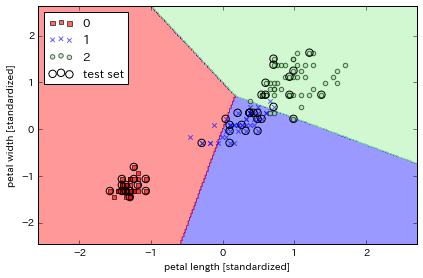

In [19]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)
plt.show()

<br>
<br>

# 3.3 ロジスティック回帰を使ったクラスのモデリング

...

## 3.3.1ロジスティック回帰の直感的知識と条件付き確率

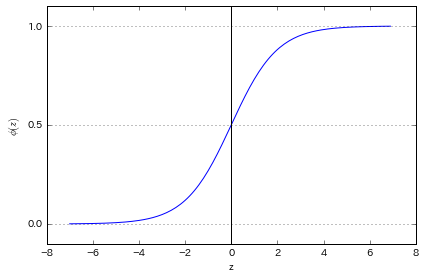

In [20]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# 0.1間隔で-7以上７未満のデータを生成
z = np.arange(-7, 7, 0.1)
# 生成したデータでシグモイド関数を実行
phi_z = sigmoid(z)
# 元のデータとシグモイド関数の出力をプロット
plt.plot(z, phi_z)
# 垂直線を追加
plt.axvline(0.0, color='k')
# y軸の上限/下限を設定
plt.ylim(-0.1, 1.1)
# 軸のラベルを設定
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y軸の目盛を追加
plt.yticks([0.0, 0.5, 1.0])
# Axesクラスのオブジェクトの取得
ax = plt.gca()
# y軸の目盛りに合わせて水平グリッド線を追加
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('./figures/sigmoid.png', dpi=300)
plt.show()

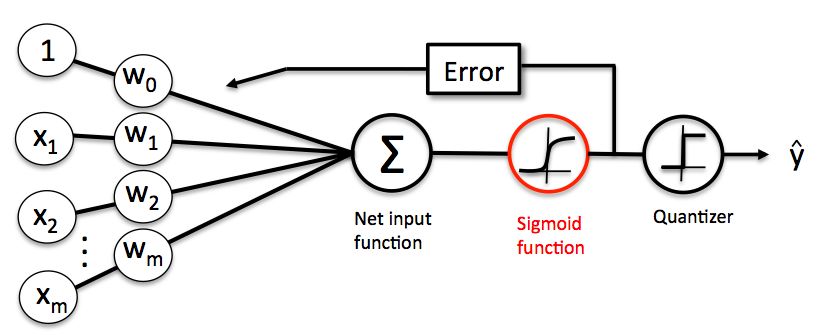

In [14]:
Image(filename='./images/03_03.png', width=500) 

<br>
<br>

## 3.3.2ロジスティック関数の重みの学習

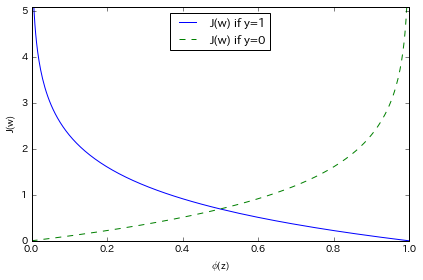

In [21]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/log_cost.png', dpi=300)
plt.show()

## 3.3.3ロジステッィク回帰の実装（BonusNotebooksより）

### 概要

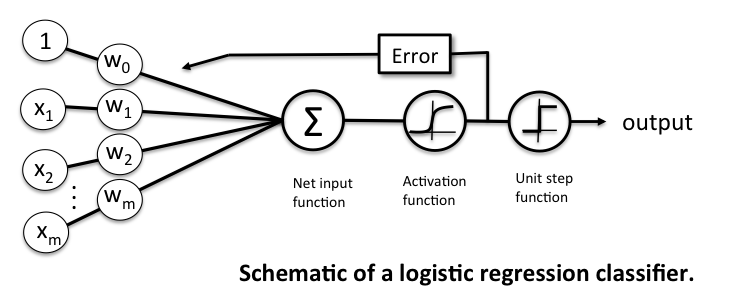

次の実装は第2章のAdalineの実装と似ている。二乗誤差コスト関数の和をロジスティックコスト関数に置き換えている。

$$J(\mathbf{w}) = \sum_{i=1}^{m} - y^{(i)} log \bigg( \phi\big(z^{(i)}\big) \bigg) - \big(1 - y^{(i)}\big) log\bigg(1-\phi\big(z^{(i)}\big)\bigg).$$


In [22]:
class LogisticRegression(object):
    """LogisticRegression classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Cost in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []       
        for i in range(self.n_iter):
            y_val = self.activation(X)
            errors = (y - y_val)
            neg_grad = X.T.dot(errors)
            self.w_[1:] += self.eta * neg_grad
            self.w_[0] += self.eta * errors.sum()
            self.cost_.append(self._logit_cost(y, self.activation(X)))
        return self

    def _logit_cost(self, y, y_val):
        logit = -y.dot(np.log(y_val)) - ((1 - y).dot(np.log(1 - y_val)))
        return logit
    
    def _sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """ Activate the logistic neuron"""
        z = self.net_input(X)
        return self._sigmoid(z)
    
    def predict_proba(self, X):
        """
        Predict class probabilities for X.
        
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        
        Returns
        ----------
          Class 1 probability : float
        
        """
        return activation(X)

    def predict(self, X):
        """
        Predict class labels for X.
        
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        
        Returns
        ----------
        class : int
            Predicted class label.
        
        """
        # equivalent to np.where(self.activation(X) >= 0.5, 1, 0)
        return np.where(self.net_input(X) >= 0.0, 1, 0)

### irisデータの読み込み

In [23]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [24]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, 0)

# sepal length と petal lengthを抽出
X = df.iloc[0:100, [0, 2]].values

# 特徴量の標準化
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

### 決定領域をplotする関数

In [29]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

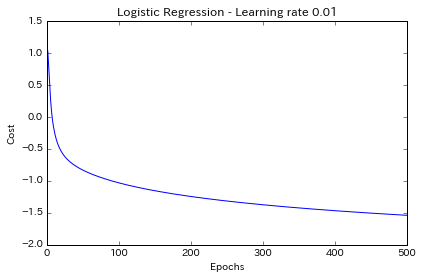

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

lr = LogisticRegression(n_iter=500, eta=0.2).fit(X_std, y)
plt.plot(range(1, len(lr.cost_) + 1), np.log10(lr.cost_))
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Logistic Regression - Learning rate 0.01')

plt.tight_layout()
plt.show()

/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


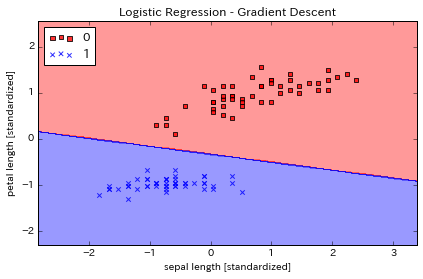

In [27]:
plot_decision_regions(X_std, y, classifier=lr)
plt.title('Logistic Regression - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

<br>
<br>

## 3.3.3scikit-learnによるロジスティック回帰モデルのトレーニング

/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


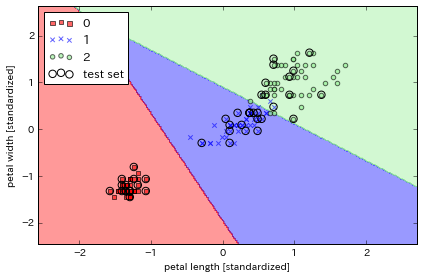

In [32]:
from sklearn.linear_model import LogisticRegression

# ロジスティック回帰のインスタンスを生成
lr = LogisticRegression(C=1000.0, random_state=0)
# トレーニングデータをモデルに適合させる
lr.fit(X_train_std, y_train)

# 決定領域をプロット
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
# 軸のラベルの設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
# 凡例を設定
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/logistic_regression.png', dpi=300)
plt.show()

In [33]:
lr.predict_proba(X_test_std[0, :].reshape(1, -1))

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

## 3.3.4 正則化による過学習への対処

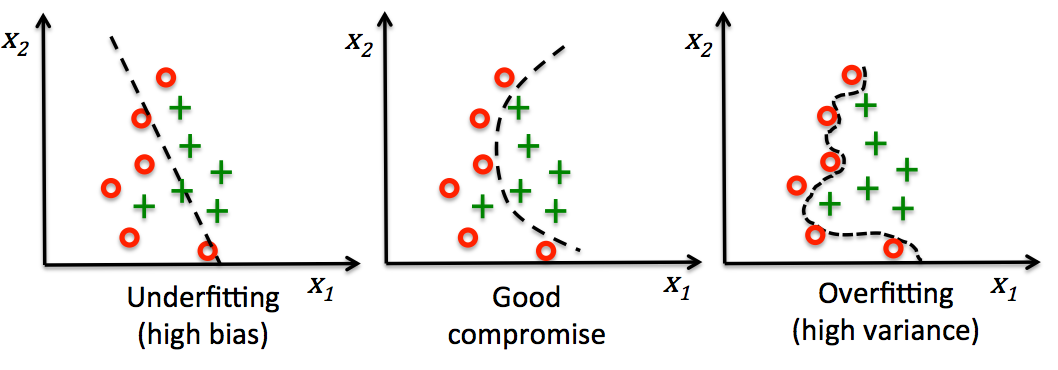

In [18]:
Image(filename='./images/03_06.png', width=700) 

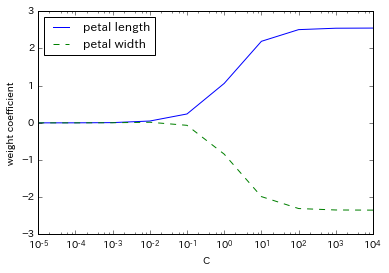

In [34]:
weights, params = [], []
for c in np.arange(-5., 5.):
    lr = LogisticRegression(C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
# plt.savefig('./figures/regression_path.png', dpi=300)
plt.show()

<br>
<br>

# サポートベクトルマシンによる最大マージン分類

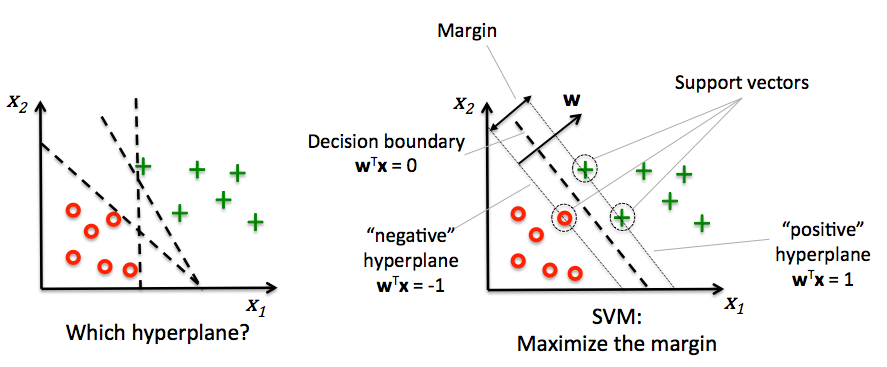

In [20]:
Image(filename='./images/03_07.png', width=700) 

## 3.4.1最大マージンを直感的に理解する

...

## 3.4.2 スラック変数を使った非線形分離可能なケースへの対処

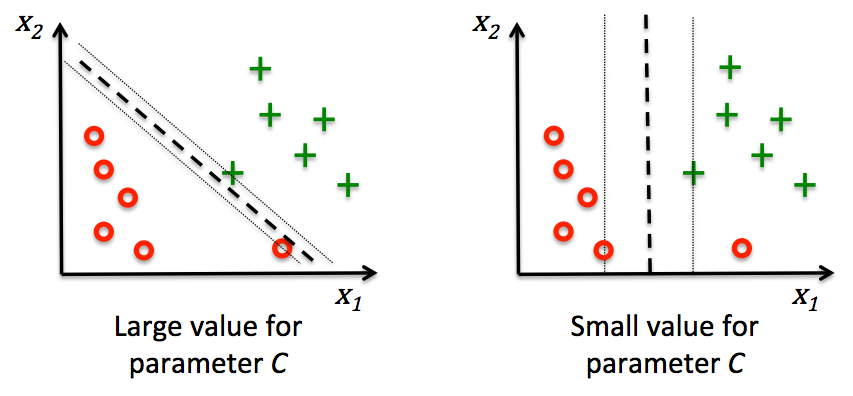

In [21]:
Image(filename='./images/03_08.png', width=600) 

/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


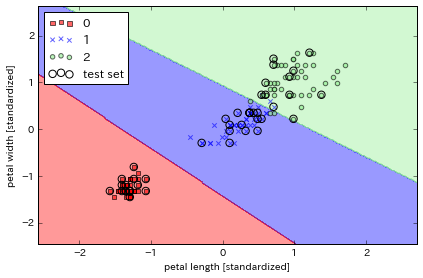

In [35]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
# 線形SVMモデルにトレーニングデータを適合させる
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_linear.png', dpi=300)
plt.show()

## 3.4.3scikit-learnでの代替実装

In [36]:
from sklearn.linear_model import SGDClassifier
#  確率的勾配降下法バージョンのパーセプトロンを生成
ppn = SGDClassifier(loss='perceptron')
# 確率的勾配降下法バージョンのロジスティック回帰を生成
lr = SGDClassifier(loss='log')
# 確率的勾配降下法バージョンのSVM（損失関数=ヒンジ関数）を生成
svm = SGDClassifier(loss='hinge')

<br>
<br>

# 3.5カーネルSVMを使った非線形問題の求解

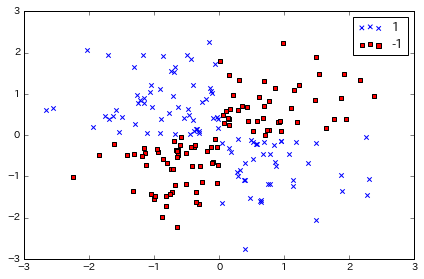

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# 乱数種を指定
np.random.seed(0)
# 標準正規分布に従う乱数で200行2列の行列を生成
X_xor = np.random.randn(200, 2)
# 2つの引数に対して排他的論理和を実行
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
# 排他的論理和の値が真の場合は1、偽の場合は-1を割り当てる
y_xor = np.where(y_xor, 1, -1)
# ラベル1を青のxでプロット
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c='b', marker='x', label='1')
# ラベル-1を赤の四角でプロット
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1],
            c='r', marker='s', label='-1')
# 軸の範囲を設定
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/xor.png', dpi=300)
plt.show()

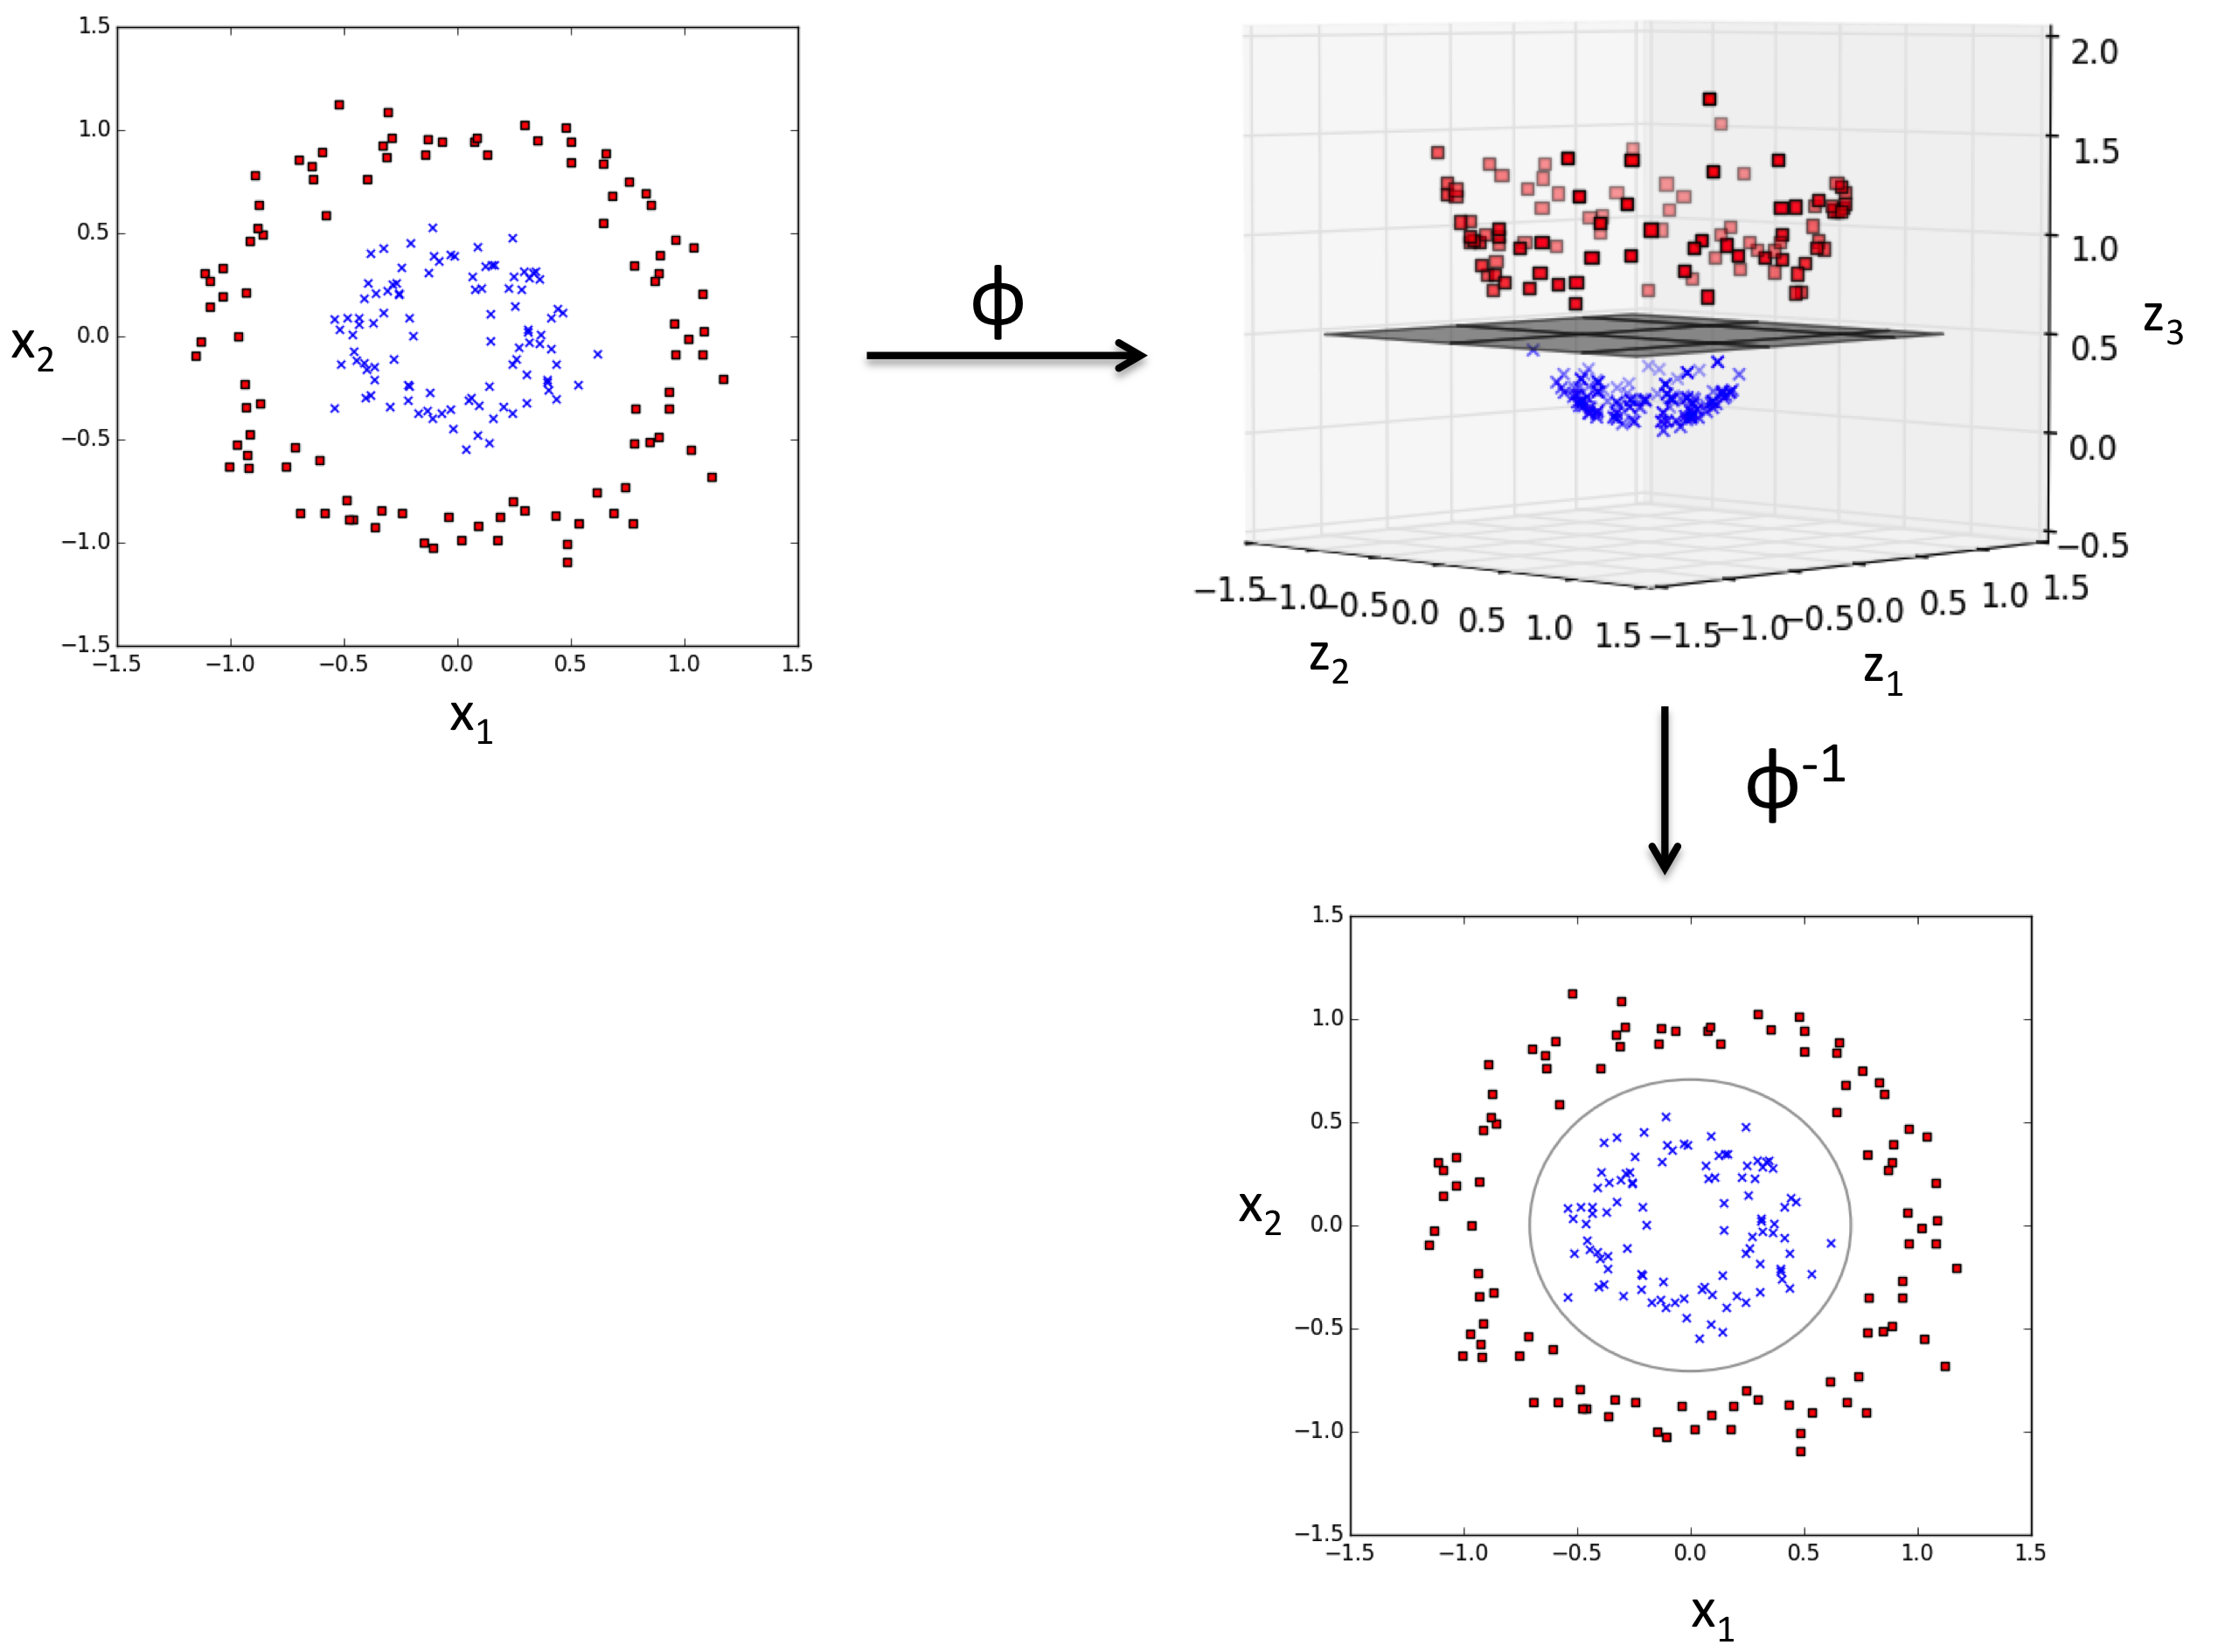

In [24]:
Image(filename='./images/03_11.png', width=700) 

<br>
<br>

## 3.5.1 カーネルトリックを使って分離超平面を高次元空間で特定する

/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


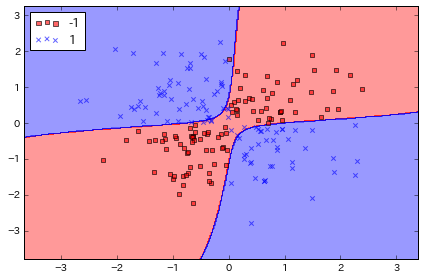

In [38]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_rbf_xor.png', dpi=300)
plt.show()

/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


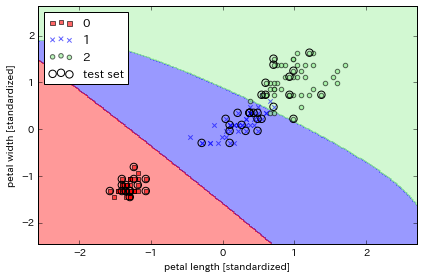

In [39]:
# γパラメータに対する直感を養うために、RBFカネールSVMをIrisデータセットに適用
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_rbf_iris_1.png', dpi=300)
plt.show()

/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


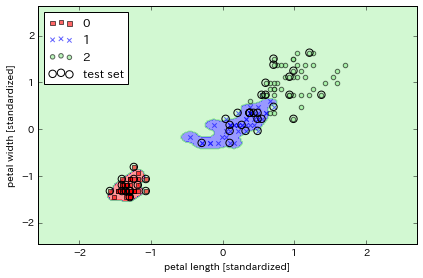

In [40]:
# γパラメータを大きくし、決定境界にどのような影響が及ぶか確認
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_rbf_iris_2.png', dpi=300)
plt.show()

<br>
<br>

# 3.6決定木学習 

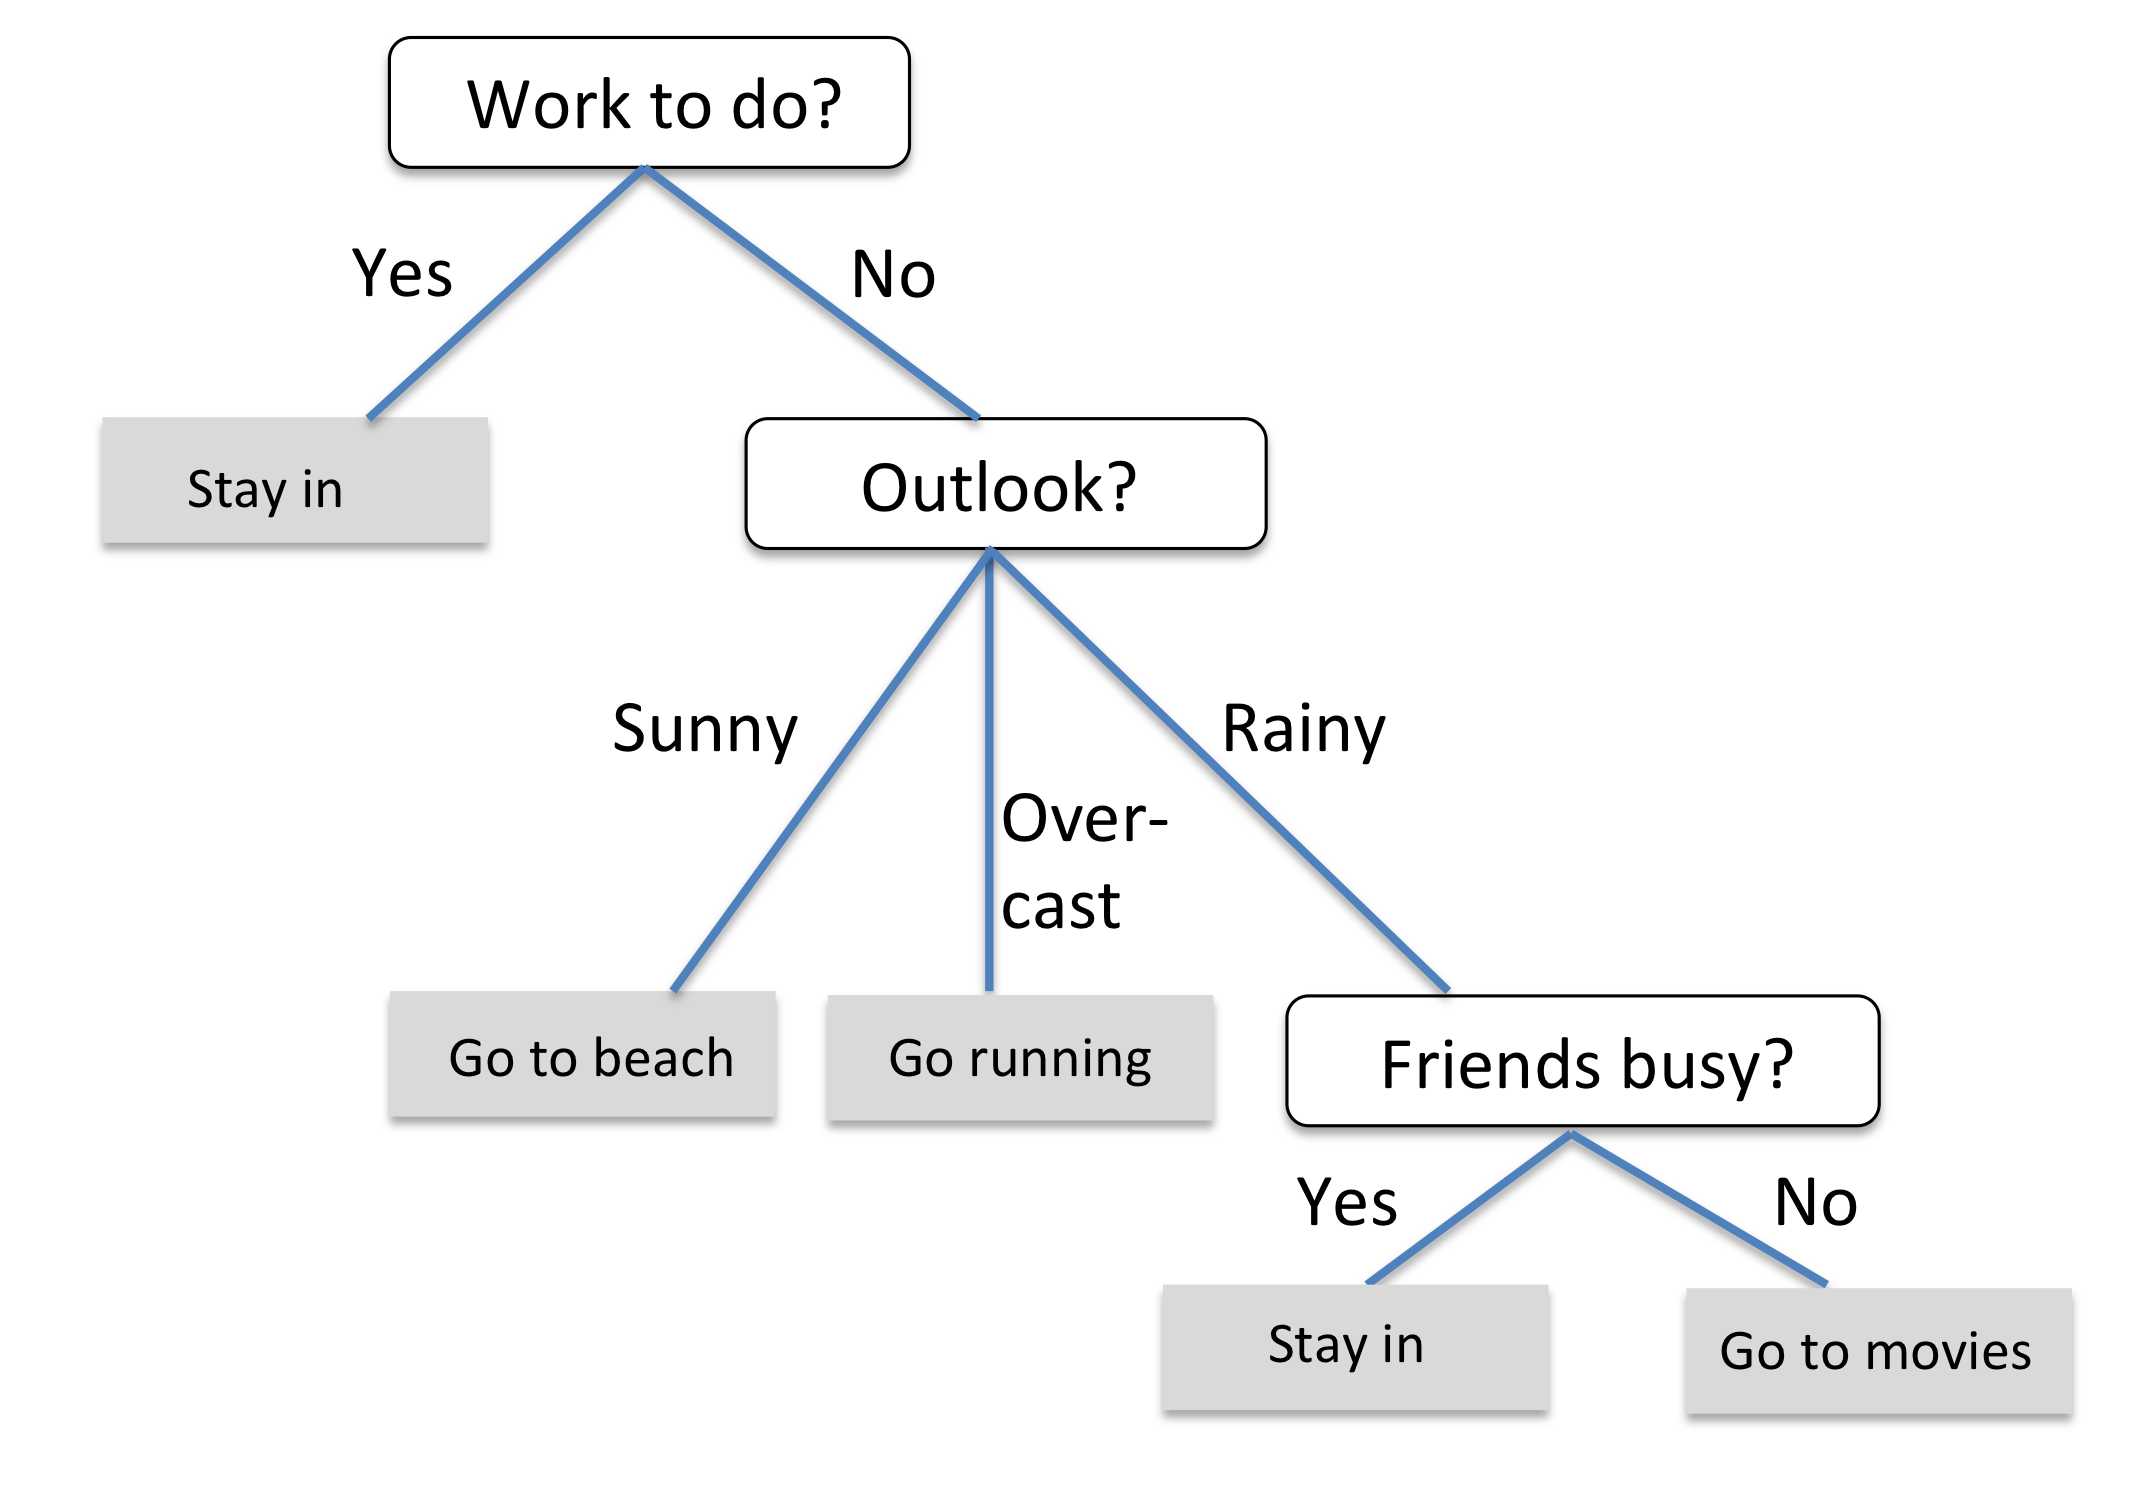

In [28]:
Image(filename='./images/03_15.png', width=500) 

<br>
<br>

## 3.6.1情報利得の最大化：できるだけ高い効果を得る

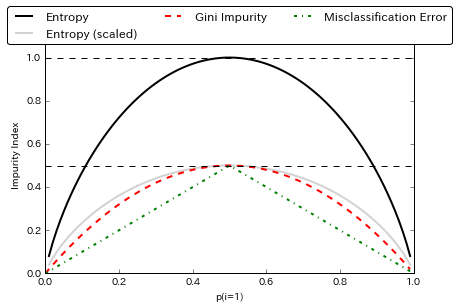

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# ジニ不純どの関数を定義
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))

# エントロピーの関数を定義
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

# 分類誤差の関数を定義
def error(p):
    return 1 - np.max([p, 1 - p])

# 確率を表す配列を生成（0から０．９９まで0.01刻み）
x = np.arange(0.0, 1.0, 0.01)
# 配列の値をもとにエントロピー、分類誤差を計算
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

# 図の作成を開始
fig = plt.figure()
ax = plt.subplot(111)
# エントロピー（2種）、ジニ不純度、分類誤差のそれぞれをループ処理
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

# 判例の設定（中央の上に配置）    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)

# 2本の水平の破線を引く
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
# 横軸の上限/下限を設定
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.tight_layout()
#plt.savefig('./figures/impurity.png', dpi=300, bbox_inches='tight')
plt.show()

<br>
<br>

## 3.6.2決定木の構築

/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


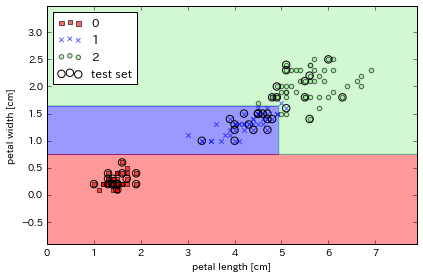

In [42]:
from sklearn.tree import DecisionTreeClassifier
# エントロピーを指標とする決定木のインスタンスを生成
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# 決定機のモデルにトレーニングデータを適合させる
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/decision_tree_decision.png', dpi=300)
plt.show()

<br>
<br>

In [43]:
from sklearn.tree import export_graphviz

export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names=['petal length', 'petal width'])

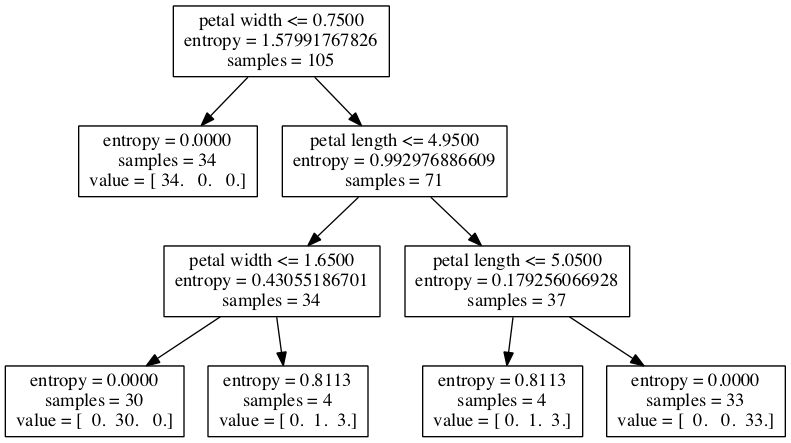

In [32]:
Image(filename='./images/03_18.png', width=600) 

**Note**

scikit-learn 0.18とpydotplusがインストールされている場合（例えば、 `pip install pydotplus`を使ってインストールできます）、次のように.dotファイルを作成せずに直接決定木を表示することもできます。 `sklearn 0.18`には、決定木を視覚的にもっと魅力的にするオプションがいくつか追加されています。

In [44]:
import pydotplus

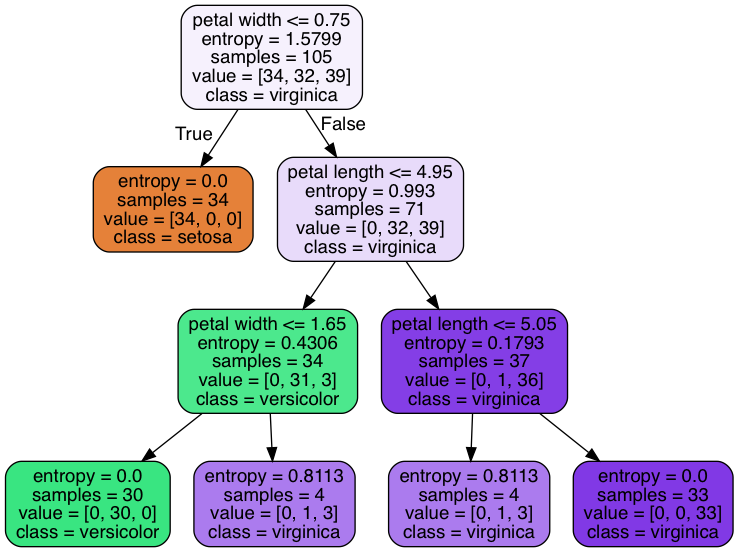

In [47]:
from IPython.display import Image
from IPython.display import display

if Version(sklearn_version) >= '0.18':
    
    try:
        
        import pydotplus
        
        dot_data = export_graphviz(
        tree, 
        out_file=None,
        # the parameters below are new in sklearn 0.18
        feature_names=['petal length', 'petal width'],  
        class_names=['setosa', 'versicolor', 'virginica'],  
        filled=True,
        rounded=True)

        graph = pydotplus.graph_from_dot_data(dot_data)  
        display(Image(graph.create_png()))

    except ImportError:
        print('pydotplus is not installed.')

<br>
<br>

## 3.6.3ランダムフォレストを使って弱い学習アルゴリズムと強い学習アルゴリズムを結合する

/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


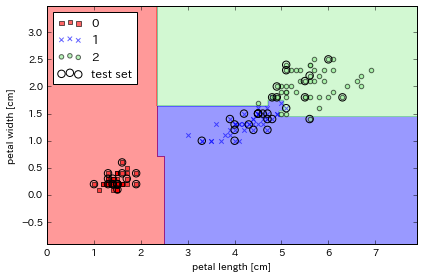

In [48]:
from sklearn.ensemble import RandomForestClassifier

# エントロピーを指標とするランダムフォレストのインスタンスを生成
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, 
                                random_state=1,
                                n_jobs=2)
# ランダムフォレストのモデルにトレーニングデータを適合させる
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/random_forest.png', dpi=300)
plt.show()

<br>
<br>

# 3.7k近傍法：怠惰学習アルゴリズム

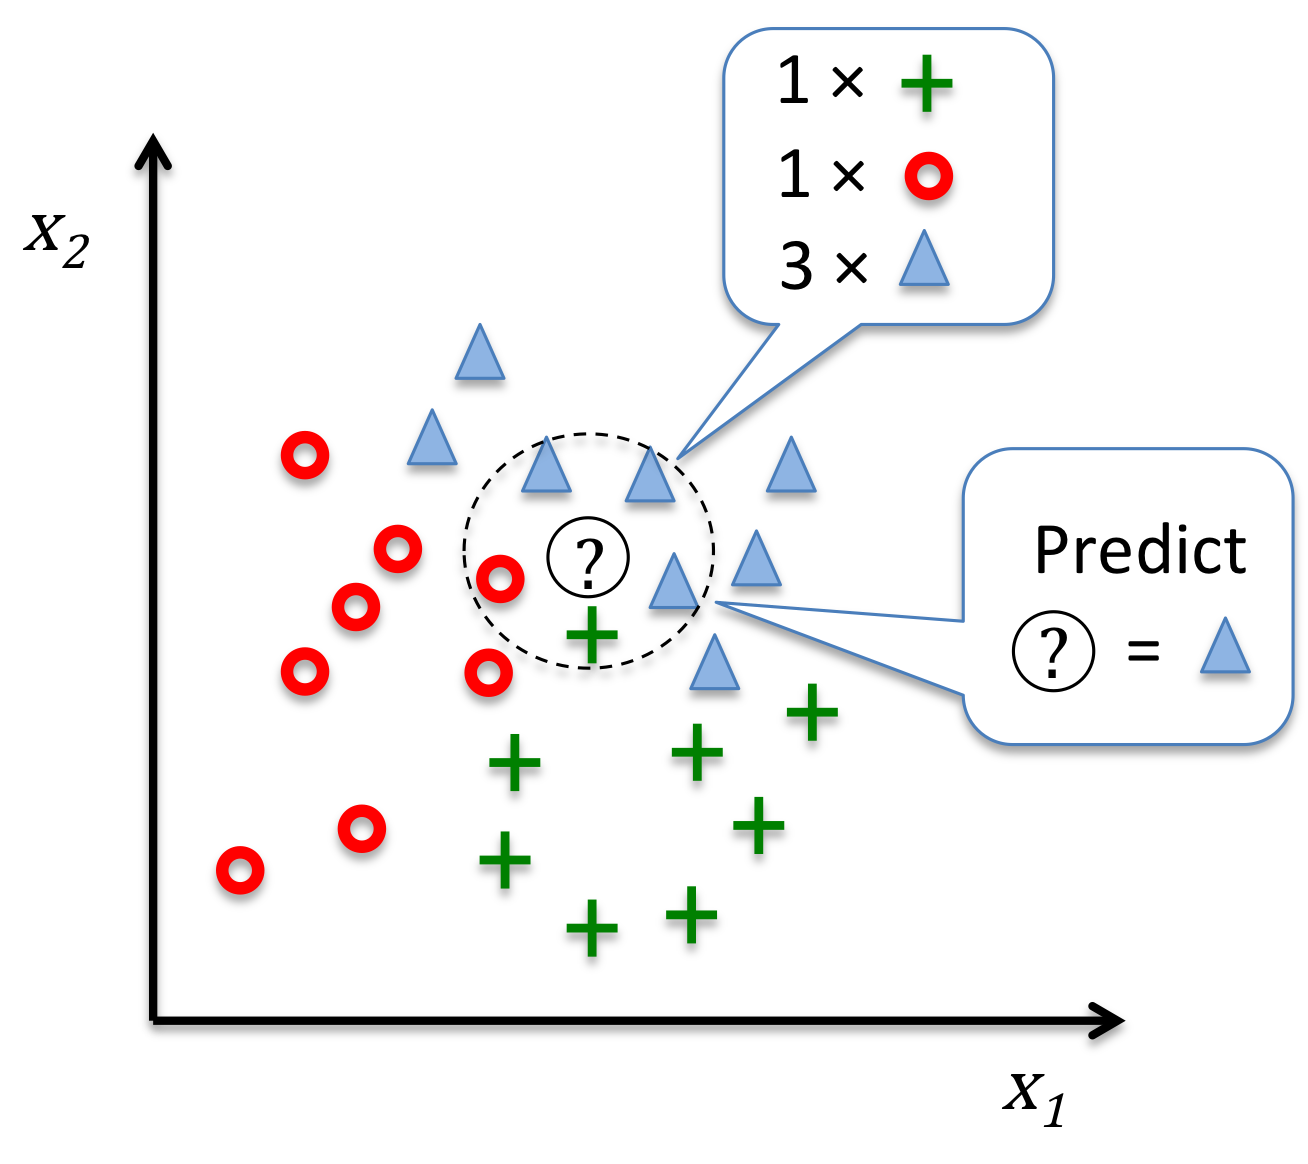

In [36]:
Image(filename='./images/03_20.png', width=400) 

/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/purin/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


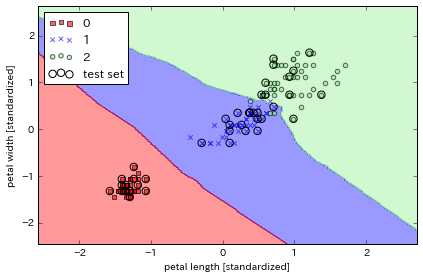

In [49]:
from sklearn.neighbors import KNeighborsClassifier

# k近傍法のインスタンスを生成
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train) # k近傍法のモデルにトレーニングデータを適合させる

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/k_nearest_neighbors.png', dpi=300)
plt.show()

<br>
<br>

# Summary

...